# 1. utils.data

# 2. torchvision

In [1]:
import torch
from torch.utils import data
from torchvision import transforms, utils
from torchvision import datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
my_trans = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])

In [3]:
train_data = datasets.ImageFolder('../../data/torchvision_data', transform=my_trans)
train_loader = data.DataLoader(train_data, batch_size=8, shuffle=True)

tensor([1, 2, 1, 0, 0, 0, 2, 1])


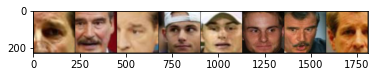

In [4]:
for i_batch, img in enumerate(train_loader):
    if i_batch == 0:
        print(img[1])
        fig = plt.figure()
        grid = utils.make_grid(img[0])
        plt.imshow(grid.numpy().transpose((1, 2, 0)))
        plt.show()
        utils.save_image(grid, '../../results/pytorch04_imageFolder_test.jpg')
    break

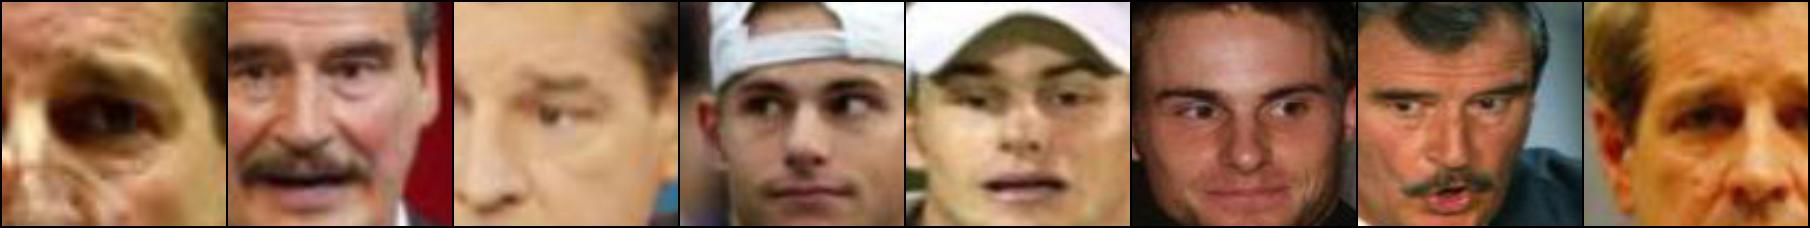

In [5]:
from PIL import Image
Image.open('../../results/pytorch04_imageFolder_test.jpg')

# 3. 可视化工具

## 3.1 tensorboardX

## 3.2 用 tesorboardX 可视化神经网络

In [6]:
# 1. 导包
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from tensorboardX import SummaryWriter

In [7]:
# 2. 构建神经网络
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)
        self.bn = nn.BatchNorm2d(20)

    def forward(self, x):
        x = F.max_pool2d(self.conv1(x), 2)
        x = F.relu(x) + F.relu(-x)
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = self.bn(x)
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        x = F.softmax(x, dim=1)
        return x

In [10]:
# 3. 将模型保存为 graph
input = torch.rand(32, 1, 28, 28)
model = Net()
with SummaryWriter(log_dir='../../logs', comment='Net') as w:
    w.add_graph(model, (input,))

## 3.2 用 tensorboardX 可视化损失值

In [12]:
import numpy as np

In [13]:
input_size = 1
output_size = 1
num_epoches = 60
learning_rate = 0.01

In [18]:
dtype = torch.FloatTensor
writer = SummaryWriter(log_dir='../../logs', comment='Linear')
np.random.seed(100)
x_train = np.linspace(-1, 1, 100).reshape(100, 1)
y_train = 3 * np.power(x_train, 2) + 2 + 0.2 * np.random.rand(x_train.size).reshape(100, 1)

In [19]:
model_2 = nn.Linear(input_size, output_size)

In [20]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=learning_rate)

In [21]:
for epoch in range(num_epoches):
    inputs = torch.from_numpy(x_train).type(dtype)
    targets = torch.from_numpy(y_train).type(dtype)

    output = model_2(inputs)
    loss = criterion(output, targets)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    writer.add_scalar('训练损失值', loss, epoch)